# TLC Trip Record Data
Полное описание данных доступно [здесь](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page). Оригинальное описание полей [тут](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

Записи включают поля, в которых указываются даты / время посадки и высадки, места посадки и высадки, расстояния поездки, подробные тарифы, типы тарифов, типы оплаты и количество пассажиров, указанное водителем. Данные, использованные в прилагаемых наборах данных, были собраны и предоставлены в Комиссию по такси и лимузинам Нью-Йорка (TLC) поставщиками технологий, уполномоченными в соответствии с программами повышения качества обслуживания пассажиров такси и ливреи (TPEP / LPEP). Данные поездки не были созданы TLC, и TLC не делает никаких заявлений относительно точности этих данных.

Перед вами набор данных о поездках желтых такси в Нью Йорке за январь 2019 года.

Нам доступны следующие метаданные:
1. VendorID — оператор такси. 1 = Creative Mobile Technologies, 2 = VeriFone Inc. 4 = ?
2. tpep_pickup_datetime — дата и время включения счетчика 
3. tpep_dropoff_datetime — дата и время выключения счетчика
4. Passenger_count — кол-во пассажиров (вводится водителем)
5. Trip_distance — прошедшее расстояние в милях, указанное таксометром
6. PULocationID — Идентификатор зоны в которой счетчик был включен
7. DOLocationID — Идентификатор зоны в которой счетчик был выключен
8. RateCodeID — тариф в конце поездки

1 = Стандартный тариф

2 = Аэропорт JFK

3 = Ньюарк

4 = Нассау или Вестчестер

5 = Договорной тариф

6 = Групповая поездка

9. Store_and_fwd_flag — Этот флаг показывает хранились ли данные о поездке "внутри машины", если не было соединения с сервером.
10. Payment_type — Код, обозначающий тип оплаты

1 = Кредитка

2 = Наличные

3 = Бесплатно или не было оплаты

4 = Спор (диспут)

5 = Неизвестно

6 = Аннулированная поездка
11. Fare_amount — время-дистанция, посчитанная счетчиком (что-то вроде нормированной длины поездки с учетом времени и дистанции, безразмерная величина)
12. Extra — Разные прибавки и доплаты. В данный момент включает в себя только 0.5\$ и 1\$ в час пик и ночная оплата
13. MTA_tax — Metropolitan commuter transportation mobility tax. Налог, выставляемый автоматически по пробегу
14. Improvement_surcharge — надбавка за благоустройство 0.30\$ (появилась в 2015)
15. Tip_amount — чаевые, заполняется автоматически для кредитных карт, наличные не считаются
16. Tolls_amount — Общая сумма всех сборов за поездку (налоговых и проч)
17. Total_amount — Суммарная стоимость
18. congestion_surcharge — сбор за пробки

FYI
[Разница между желтым и зеленым такси](https://freetoursbyfoot.com/taxi-guide-hailing-cab-nyc/) и еще [тут](https://en.wikipedia.org/wiki/Boro_taxi)

# Задание
1. Проведите ABC анализ по стартовым-конечным локациям поездок. Существенно ли результаты анализа различаются в разбивке по операторам такси?
2. Проведите XYZ анализ по стартовым-конечным локациям поездок. Существенно ли результаты анализа различаются в разбивке по операторам такси?
3. Для нескольких одинаковых зон посадки и высадки (штук 5) сравните средние значения длительности поездки для операторов 1 и 2. Проверьте истинность гипотезы о равенстве среднего времени для выбранных маршрутов с помощью t критерия и pvalue ([модуль stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html))
4. В базе student_x создайте таблицу для загрузки этого набора данных. Загрузите набор данных в созданную таблицу, и затем в redash постройте дэшборд отражающий кол-во поездок каждый день в разбивке по операторам такси, а также общую сумму выручки за вычетом налогов.

Загрузить данные можно по аналогии, для этого нужно "подсоединить" свой гугл драйв к ноутбуку
https://drive.google.com/file/d/1xWbT8jYI-YrrOD991NODC9zRlzmQAoQ3/view?usp=sharing 

Предварительно нужно скопировать данные себе на гугл драйв. Самый простой способ это "создать ярлык", чтобы не скачивать, а потом не загружать 600мб данных
https://drive.google.com/file/d/1eIQC77qhkAdzoigmXR6jo2jLBCISx3vP/view?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/content/drive/My Drive/yellow_tripdata_2019-01.csv')
data.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


In [ ]:
# ваш код начинается здесь

Оценим исходные данные, 

удалим проблемные значения

In [ ]:
data.shape

(7667792, 18)

In [ ]:
data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,2.811814e+06
mean,1.636775e+00,1.567078e+00,2.801084e+00,1.058371e+00,1.655009e+02,1.637529e+02,1.291776e+00,1.240941e+01,3.280394e-01,4.968458e-01,1.827367e+00,3.169187e-01,2.993382e-01,1.568222e+01,3.289691e-05
std,5.398204e-01,1.224431e+00,3.737529e+00,6.780889e-01,6.639180e+01,7.036445e+01,4.733229e-01,2.620721e+02,5.074789e-01,5.337843e-02,2.501213e+00,2.023665e+00,1.911711e-02,2.622932e+02,9.068695e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-3.620000e+02,-6.000000e+01,-5.000000e-01,-6.350000e+01,-7.000000e+01,-3.000000e-01,-3.628000e+02,0.000000e+00
25%,1.000000e+00,1.000000e+00,9.000000e-01,1.000000e+00,1.300000e+02,1.130000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.190000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.530000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,8.500000e+00,0.000000e+00,5.000000e-01,1.430000e+00,0.000000e+00,3.000000e-01,1.127000e+01,0.000000e+00
75%,2.000000e+00,2.000000e+00,2.800000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.350000e+01,5.000000e-01,5.000000e-01,2.330000e+00,0.000000e+00,3.000000e-01,1.656000e+01,0.000000e+00
max,4.000000e+00,9.000000e+00,8.318000e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.232599e+05,5.353800e+02,6.080000e+01,7.872500e+02,3.288000e+03,6.000000e-01,6.232617e+05,2.500000e+00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7667792 entries, 0 to 7667791
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   RatecodeID             int64  
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(9), int64(6), object(3)
memory usage: 1.0+ GB


In [ ]:
data[data['total_amount']<=0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
663,2,2019-01-01 00:32:56,2019-01-01 00:33:35,2,0.10,1,N,148,148,3,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,NaN
2402,2,2019-01-01 00:14:18,2019-01-01 00:40:55,1,4.13,1,N,170,238,4,-19.0,-0.5,-0.5,0.0,0.0,-0.3,-20.3,NaN
2541,2,2019-01-01 00:31:27,2019-01-01 00:42:39,1,1.35,1,N,162,234,4,-8.5,-0.5,-0.5,0.0,0.0,-0.3,-9.8,NaN
2544,2,2019-01-01 00:45:57,2019-01-01 00:46:07,1,0.00,1,N,234,234,4,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,NaN
2547,2,2019-01-01 00:48:35,2019-01-01 00:49:59,1,0.16,1,N,234,234,4,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667014,2,2019-01-31 23:52:30,2019-01-31 23:53:26,1,0.09,1,N,170,233,3,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,0.0
7667788,2,2019-01-31 23:32:03,2019-01-31 23:33:11,1,0.00,1,N,193,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7667789,2,2019-01-31 23:36:36,2019-01-31 23:36:40,1,0.00,1,N,264,264,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7667790,2,2019-01-31 23:14:53,2019-01-31 23:15:20,1,0.00,1,N,264,7,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data = data.drop(data[data['total_amount']<=0].index)
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.50,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.60,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.00,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.00,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.00,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667783,2,2019-01-31 23:04:25,2019-01-31 23:17:09,2,4.15,1,N,186,13,2,14.5,0.5,0.5,0.00,0.0,0.3,15.80,0.0
7667784,2,2019-01-31 23:32:34,2019-01-31 23:41:40,1,1.34,1,N,68,233,2,8.0,0.5,0.5,0.00,0.0,0.3,9.30,0.0
7667785,2,2019-01-31 23:47:48,2019-02-01 00:01:08,1,1.45,1,N,161,229,1,10.5,0.5,0.5,2.36,0.0,0.3,14.16,0.0
7667786,2,2019-01-31 23:31:54,2019-01-31 23:50:36,2,4.28,1,N,186,262,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96,0.0


In [ ]:
data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,7.659247e+06,7.659247e+06,7.659247e+06,7.659247e+06,7.659247e+06,7.659247e+06,7.659247e+06,7.659247e+06,7.659247e+06,7.659247e+06,7.659247e+06,7.659247e+06,7.659247e+06,7.659247e+06,2.808677e+06
mean,1.636403e+00,1.567111e+00,2.803275e+00,1.057833e+00,1.655016e+02,1.637560e+02,1.289859e+00,1.243253e+01,3.287081e-01,4.978451e-01,1.829424e+00,3.173653e-01,2.999513e-01,1.571014e+01,3.293366e-05
std,5.399767e-01,1.224464e+00,3.737956e+00,6.597863e-01,6.638726e+01,7.036520e+01,4.691348e-01,2.622166e+02,5.070599e-01,4.371746e-02,2.501727e+00,2.024415e+00,3.824527e-03,2.624374e+02,9.073758e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e-01,0.000000e+00
25%,1.000000e+00,1.000000e+00,9.000000e-01,1.000000e+00,1.310000e+02,1.130000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.300000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.530000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,8.500000e+00,0.000000e+00,5.000000e-01,1.440000e+00,0.000000e+00,3.000000e-01,1.127000e+01,0.000000e+00
75%,2.000000e+00,2.000000e+00,2.800000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.350000e+01,5.000000e-01,5.000000e-01,2.340000e+00,0.000000e+00,3.000000e-01,1.656000e+01,0.000000e+00
max,4.000000e+00,9.000000e+00,8.318000e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.232599e+05,5.353800e+02,6.080000e+01,7.872500e+02,3.288000e+03,6.000000e-01,6.232617e+05,2.500000e+00


In [ ]:
data = data.drop(data[data['total_amount']>100000].index)

In [ ]:
data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,7.659245e+06,7.659245e+06,7.659245e+06,7.659245e+06,7.659245e+06,7.659245e+06,7.659245e+06,7.659245e+06,7.659245e+06,7.659245e+06,7.659245e+06,7.659245e+06,7.659245e+06,7.659245e+06,2.808676e+06
mean,1.636403e+00,1.567111e+00,2.803275e+00,1.057833e+00,1.655016e+02,1.637560e+02,1.289858e+00,1.230472e+01,3.286381e-01,4.978448e-01,1.829424e+00,3.173653e-01,2.999514e-01,1.558227e+01,3.293367e-05
std,5.399766e-01,1.224464e+00,3.737956e+00,6.597864e-01,6.638725e+01,7.036520e+01,4.691344e-01,3.907797e+01,4.687566e-01,4.371195e-02,2.501727e+00,2.024416e+00,3.822992e-03,3.991839e+01,9.073760e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e-01,0.000000e+00
25%,1.000000e+00,1.000000e+00,9.000000e-01,1.000000e+00,1.310000e+02,1.130000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.300000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.530000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,8.500000e+00,0.000000e+00,5.000000e-01,1.440000e+00,0.000000e+00,3.000000e-01,1.127000e+01,0.000000e+00
75%,2.000000e+00,2.000000e+00,2.800000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.350000e+01,5.000000e-01,5.000000e-01,2.340000e+00,0.000000e+00,3.000000e-01,1.656000e+01,0.000000e+00
max,4.000000e+00,9.000000e+00,8.318000e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,3.609030e+04,2.304000e+01,6.080000e+01,7.872500e+02,3.288000e+03,6.000000e-01,3.609030e+04,2.500000e+00


In [ ]:
data = data.astype({'tpep_pickup_datetime':  'datetime64[ms]',
                    'tpep_dropoff_datetime':  'datetime64[ms]'})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7659245 entries, 0 to 7667787
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        int64         
 4   trip_distance          float64       
 5   RatecodeID             int64         
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
dtypes: datetime64[ns](2), 

In [ ]:
data['week_number'] = data['tpep_pickup_datetime'].dt.week
data['year_number'] = data['tpep_pickup_datetime'].dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [ ]:
data['year_number'].unique()

array([2019, 2018, 2008, 2009, 2001, 2088])

In [ ]:
data = data.drop(data[data['year_number'] == 2001].index)
data = data.drop(data[data['year_number'] == 2088].index)

### **1. АВС-анализ**

In [ ]:
summary = data['total_amount'].sum()
summary

119348376.14000005

In [ ]:
group = data.groupby(['PULocationID', 'DOLocationID'])['total_amount'].sum() / summary
group

PULocationID  DOLocationID
1             1               3.394499e-04
              132             2.714909e-06
              137             6.944376e-07
              142             6.987946e-07
              164             7.842587e-08
                                  ...     
265           259             1.985783e-07
              262             1.789719e-07
              263             7.700985e-07
              264             1.356407e-05
              265             2.058253e-03
Name: total_amount, Length: 32238, dtype: float64

In [ ]:
group = group.sort_values(ascending=False)
group = group[group >= 0.0]
group

PULocationID  DOLocationID
264           264             2.036767e-02
138           230             4.158003e-03
132           230             4.035676e-03
              265             3.809867e-03
237           236             3.591191e-03
                                  ...     
160           265             2.597438e-09
84            84              2.597438e-09
241           145             2.513650e-09
              264             2.513650e-09
70            98              2.513650e-09
Name: total_amount, Length: 32238, dtype: float64

In [ ]:
group_cumsum = group.cumsum()
group_cumsum

PULocationID  DOLocationID
264           264             0.020368
138           230             0.024526
132           230             0.028561
              265             0.032371
237           236             0.035962
                                ...   
160           265             1.000000
84            84              1.000000
241           145             1.000000
              264             1.000000
70            98              1.000000
Name: total_amount, Length: 32238, dtype: float64

In [ ]:
def ABC_segmentation(perc):
  if perc < 0.8:
    return 'A'
  if perc >= 0.8 and perc < 0.95:
    return 'B'
  if perc >= 0.95:
    return 'C'

group_abc = group_cumsum.apply(ABC_segmentation)
group_abc

PULocationID  DOLocationID
264           264             A
138           230             A
132           230             A
              265             A
237           236             A
                             ..
160           265             C
84            84              C
241           145             C
              264             C
70            98              C
Name: total_amount, Length: 32238, dtype: object

In [ ]:
group_abc.value_counts()

C    26043
B     4150
A     2045
Name: total_amount, dtype: int64

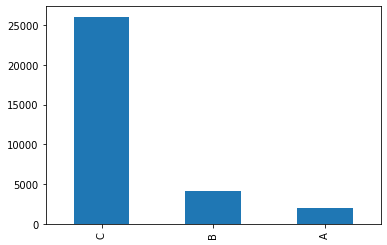

In [ ]:
group_abc.value_counts().plot(kind='bar')

In [ ]:
2045 / (2045 + 4150 + 26043)

0.06343445623177617

In [ ]:
4150 / (2045 + 4150 + 26043)

0.12873007010360443

In [ ]:
26043 / (2045 + 4150 + 26043)

0.8078354736646194

Разбиение в целом не очень удачное

Рассмотрим разбивку по операторам

Оператор №1

In [ ]:
data_1 = data[data['VendorID'] == 1]
data_1

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,week_number,year_number
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,1,2019
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,1,2019
7,1,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1.3,1,N,163,229,1,6.5,0.5,0.5,1.25,0.0,0.3,9.05,NaN,1,2019
8,1,2019-01-01 00:32:01,2019-01-01 00:45:39,1,3.7,1,N,229,7,1,13.5,0.5,0.5,3.70,0.0,0.3,18.50,NaN,1,2019
9,1,2019-01-01 00:57:32,2019-01-01 01:09:32,2,2.1,1,N,141,234,1,10.0,0.5,0.5,1.70,0.0,0.3,13.00,NaN,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667774,1,2019-01-31 23:58:24,2019-02-01 00:05:11,1,1.8,1,N,162,142,1,7.5,0.5,0.5,2.20,0.0,0.3,11.00,0.0,5,2019
7667776,1,2019-01-31 23:13:16,2019-01-31 23:25:28,4,2.6,1,N,87,90,2,11.0,0.5,0.5,0.00,0.0,0.3,12.30,0.0,5,2019
7667777,1,2019-01-31 23:32:28,2019-01-31 23:42:31,3,1.8,1,N,114,164,1,9.0,0.5,0.5,2.05,0.0,0.3,12.35,0.0,5,2019
7667778,1,2019-01-31 23:48:29,2019-01-31 23:58:06,2,2.0,1,N,164,229,1,9.0,0.5,0.5,1.03,0.0,0.3,11.33,0.0,5,2019


In [ ]:
summary_1 = data_1['total_amount'].sum()
summary_1

44438762.390000015

In [ ]:
group_1 = data_1.groupby(['PULocationID', 'DOLocationID'])['total_amount'].sum() / summary_1
group_1

PULocationID  DOLocationID
1             1               3.699932e-04
              264             1.912745e-06
              265             1.273663e-06
2             65              1.520069e-06
              107             1.581052e-06
                                  ...     
265           239             3.049140e-07
              249             1.154398e-06
              255             1.801580e-06
              264             1.098028e-05
              265             2.150523e-03
Name: total_amount, Length: 21000, dtype: float64

In [ ]:
group_1 = group_1.sort_values(ascending=False)
group_1 = group_1[group_1 >= 0.0]
group_1

PULocationID  DOLocationID
264           264             4.187568e-02
138           230             3.963185e-03
237           236             3.899068e-03
132           230             3.733076e-03
236           237             3.621850e-03
                                  ...     
35            265             6.750863e-09
241           145             6.750863e-09
216           130             6.750863e-09
134           93              6.750863e-09
93            223             6.750863e-09
Name: total_amount, Length: 21000, dtype: float64

In [ ]:
group_1_cumsum = group_1.cumsum()
group_1_cumsum

PULocationID  DOLocationID
264           264             0.041876
138           230             0.045839
237           236             0.049738
132           230             0.053471
236           237             0.057093
                                ...   
35            265             1.000000
241           145             1.000000
216           130             1.000000
134           93              1.000000
93            223             1.000000
Name: total_amount, Length: 21000, dtype: float64

In [ ]:
group_1_abc = group_1_cumsum.apply(ABC_segmentation)
group_1_abc

PULocationID  DOLocationID
264           264             A
138           230             A
237           236             A
132           230             A
236           237             A
                             ..
35            265             C
241           145             C
216           130             C
134           93              C
93            223             C
Name: total_amount, Length: 21000, dtype: object

In [ ]:
group_1_abc.value_counts()

C    15803
B     3293
A     1904
Name: total_amount, dtype: int64

In [ ]:
1904 / (1904 + 3293 + 15803)

0.09066666666666667

In [ ]:
3293 / (1904 + 3293 + 15803)

0.15680952380952382

In [ ]:
15803 / (1904 + 3293 + 15803)

0.7525238095238095

Оператор №2

In [ ]:
data_2 = data[data['VendorID'] == 2]
data_2

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,week_number,year_number
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.00,1,N,236,236,1,4.5,0.5,0.5,0.00,0.00,0.3,5.80,NaN,51,2018
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.00,1,N,193,193,2,3.5,0.5,0.5,0.00,0.00,0.3,7.55,NaN,48,2018
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.00,2,N,193,193,2,52.0,0.0,0.5,0.00,0.00,0.3,55.55,NaN,48,2018
5,2,2018-11-28 16:25:49,2018-11-28 16:28:26,5,0.00,1,N,193,193,2,3.5,0.5,0.5,0.00,5.76,0.3,13.31,NaN,48,2018
6,2,2018-11-28 16:29:37,2018-11-28 16:33:43,5,0.00,2,N,193,193,2,52.0,0.0,0.5,0.00,0.00,0.3,55.55,NaN,48,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667783,2,2019-01-31 23:04:25,2019-01-31 23:17:09,2,4.15,1,N,186,13,2,14.5,0.5,0.5,0.00,0.00,0.3,15.80,0.0,5,2019
7667784,2,2019-01-31 23:32:34,2019-01-31 23:41:40,1,1.34,1,N,68,233,2,8.0,0.5,0.5,0.00,0.00,0.3,9.30,0.0,5,2019
7667785,2,2019-01-31 23:47:48,2019-02-01 00:01:08,1,1.45,1,N,161,229,1,10.5,0.5,0.5,2.36,0.00,0.3,14.16,0.0,5,2019
7667786,2,2019-01-31 23:31:54,2019-01-31 23:50:36,2,4.28,1,N,186,262,1,17.0,0.5,0.5,3.66,0.00,0.3,21.96,0.0,5,2019


In [ ]:
summary_2 = data_2['total_amount'].sum()
summary_2

73771173.52999993

In [ ]:
group_2 = data_2.groupby(['PULocationID', 'DOLocationID'])['total_amount'].sum() / summary_2
group_2

PULocationID  DOLocationID
1             1               3.230582e-04
              132             4.392231e-06
              137             1.123474e-06
              142             1.130523e-06
              164             1.268788e-07
                                  ...     
265           259             3.212637e-07
              262             2.895440e-07
              263             1.245880e-06
              264             1.532984e-05
              265             2.023627e-03
Name: total_amount, Length: 29958, dtype: float64

In [ ]:
group_2 = group_2.sort_values(ascending=False)
group_2 = group_2[group_2 >= 0.0]
group_2

PULocationID  DOLocationID
264           264             7.725456e-03
132           265             4.418477e-03
138           230             4.261159e-03
132           230             4.235149e-03
237           236             3.394400e-03
                                  ...     
97            264             1.084434e-08
182           10              5.422172e-09
188           264             5.422172e-09
264           11              4.202183e-09
185           31              4.202183e-09
Name: total_amount, Length: 29958, dtype: float64

In [ ]:
group_2_cumsum = group_2.cumsum()
group_2_cumsum

PULocationID  DOLocationID
264           264             0.007725
132           265             0.012144
138           230             0.016405
132           230             0.020640
237           236             0.024035
                                ...   
97            264             1.000000
182           10              1.000000
188           264             1.000000
264           11              1.000000
185           31              1.000000
Name: total_amount, Length: 29958, dtype: float64

In [ ]:
group_2_abc = group_2_cumsum.apply(ABC_segmentation)
group_2_abc

PULocationID  DOLocationID
264           264             A
132           265             A
138           230             A
132           230             A
237           236             A
                             ..
97            264             C
182           10              C
188           264             C
264           11              C
185           31              C
Name: total_amount, Length: 29958, dtype: object

In [ ]:
group_2_abc.value_counts()

C    23229
B     4595
A     2134
Name: total_amount, dtype: int64

In [ ]:
2134 / (2134 + 4595 + 23229)

0.07123305961679685

In [ ]:
4595 / (2134 + 4595 + 23229)

0.15338140062754524

In [ ]:
23229 / (2134 + 4595 + 23229)

0.7753855397556579

По операторам №1 и №2 разбиение не отличается существенно от общего.

### **2. XYZ-анализ**

In [ ]:
data_num = data[['PULocationID', 'DOLocationID', 'year_number', 'week_number', 'tpep_pickup_datetime']]
orders = data_num.groupby(['year_number', 'week_number', 'PULocationID', 'DOLocationID']).size()
orders

year_number  week_number  PULocationID  DOLocationID
2008         1            7             140             1
                          68            88              1
                          107           107             1
                                        249             1
                          132           181             1
                                                       ..
2019         27           142           43              1
                          246           50              1
             30           148           234             1
             33           114           181             1
             36           148           79              1
Length: 102015, dtype: int64

In [ ]:
orders = orders.reset_index().iloc[:,2:].rename({0: 'orders'}, axis=1)
orders

,PULocationID,DOLocationID,orders
0,7,140,1
1,68,88,1
2,107,107,1
3,107,249,1
4,132,181,1
...,...,...,...
102010,142,43,1
102011,246,50,1
102012,148,234,1
102013,114,181,1


In [ ]:
orders_std = orders.groupby(['PULocationID', 'DOLocationID']).std().dropna()
orders_std

orders
PULocationID DOLocationID           
1            1             26.092144
             132            0.707107
             265            0.957427
2            2              0.000000
3            3              1.788854
...                              ...
265          259            0.000000
             262            0.000000
             263            0.547723
             264            0.707107
             265           72.316665

[23645 rows x 1 columns]

In [ ]:
orders_mean = orders.groupby(['PULocationID', 'DOLocationID']).mean().dropna()
orders_mean

orders
PULocationID DOLocationID        
1            1               84.4
             132              1.5
             137              1.0
             142              1.0
             164              1.0
...                           ...
265          259              2.0
             262              1.0
             263              1.4
             264              4.0
             265            598.8

[32238 rows x 1 columns]

In [ ]:
volatility = (orders_std / orders_mean).dropna()
volatility

orders
PULocationID DOLocationID          
1            1             0.309149
             132           0.471405
             265           0.547101
2            2             0.000000
3            3             0.638877
...                             ...
265          259           0.000000
             262           0.000000
             263           0.391230
             264           0.176777
             265           0.120769

[23645 rows x 1 columns]

(array([4860., 2368., 4677., 6153., 2869., 1873.,  447.,  328.,   58.,
          12.]),
 array([0.  , 0.12, 0.24, 0.36, 0.48, 0.6 , 0.72, 0.84, 0.96, 1.08, 1.2 ]),
 <a list of 10 Patch objects>)

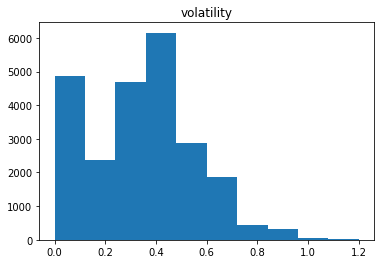

In [ ]:
plt.figure()
plt.title('volatility')
plt.hist(volatility['orders'])

In [ ]:
def XYZ_segmentation(vol):
  if vol < 0.25:
    return 'X'
  if vol >= 0.25 and vol < 0.5:
    return 'Y'
  if vol >= 0.5:
    return 'Z'

group_xyz = volatility['orders'].apply(XYZ_segmentation)
group_xyz

PULocationID  DOLocationID
1             1               Y
              132             Y
              265             Z
2             2               X
3             3               Z
                             ..
265           259             X
              262             X
              263             Y
              264             X
              265             X
Name: orders, Length: 23645, dtype: object

In [ ]:
group_abc = pd.DataFrame(group_abc).rename({'total_amount': 'ABC_seg'}, axis=1)
group_abc['XYZ_seg'] = volatility['orders'].apply(XYZ_segmentation)
group_class = group_abc.dropna()
group_class['class'] = group_abc['ABC_seg'] + group_abc['XYZ_seg']
group_class

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


ABC_seg XYZ_seg class
PULocationID DOLocationID                      
264          264                A       Z    AZ
138          230                A       Y    AY
132          230                A       Y    AY
             265                A       Z    AZ
237          236                A       Z    AZ
...                           ...     ...   ...
259          240                C       X    CX
47           264                C       X    CX
63           180                C       Y    CY
29           264                C       X    CX
19           264                C       X    CX

[23645 rows x 3 columns]

In [ ]:
group_class['class'].value_counts()

CY    7287
CX    5539
CZ    4624
BY    2542
BX    1236
AX     948
AY     804
BZ     372
AZ     293
Name: class, dtype: int64

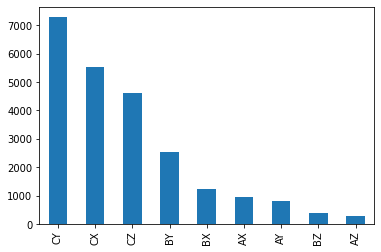

In [ ]:
group_class['class'].value_counts().plot(kind='bar')

Оператор №1

In [ ]:
data_1_num = data_1[['PULocationID', 'DOLocationID', 'year_number', 'week_number', 'tpep_pickup_datetime']]
orders_1 = data_1_num.groupby(['year_number', 'week_number', 'PULocationID', 'DOLocationID']).size()
orders_1

year_number  week_number  PULocationID  DOLocationID
2019         1            1             1                40
                                        264               1
                          2             65                1
                                        107               1
                          3             169               1
                                                       ... 
             5            265           130               1
                                        164               1
                                        231               1
                                        264               3
                                        265             192
Length: 63192, dtype: int64

In [ ]:
orders_1 = orders_1.reset_index().iloc[:,2:].rename({0: 'orders'}, axis=1)
orders_1

,PULocationID,DOLocationID,orders
0,1,1,40
1,1,264,1
2,2,65,1
3,2,107,1
4,3,169,1
...,...,...,...
63187,265,130,1
63188,265,164,1
63189,265,231,1
63190,265,264,3


In [ ]:
orders_1_std = orders_1.groupby(['PULocationID', 'DOLocationID']).std().dropna()
orders_1_std

orders
PULocationID DOLocationID           
1            1             13.583078
             265            0.000000
3            200            0.000000
             233            0.957427
4            1              0.000000
...                              ...
265          191            0.000000
             203            0.000000
             231            1.140175
             264            0.836660
             265           32.959066

[14471 rows x 1 columns]

In [ ]:
orders_1_mean = orders_1.groupby(['PULocationID', 'DOLocationID']).mean().dropna()
orders_1_mean

orders
PULocationID DOLocationID        
1            1               38.0
             264              1.0
             265              1.0
2            65               1.0
             107              1.0
...                           ...
265          239              1.0
             249              1.0
             255              1.0
             264              2.2
             265            233.6

[21000 rows x 1 columns]

In [ ]:
volatility_1 = (orders_1_std / orders_1_mean).dropna()
volatility_1

orders
PULocationID DOLocationID          
1            1             0.357449
             265           0.000000
3            200           0.000000
             233           0.348155
4            1             0.000000
...                             ...
265          191           0.000000
             203           0.000000
             231           0.475073
             264           0.380300
             265           0.141092

[14471 rows x 1 columns]

(array([3.281e+03, 3.470e+03, 4.744e+03, 1.757e+03, 9.180e+02, 2.540e+02,
        4.200e+01, 4.000e+00, 0.000e+00, 1.000e+00]),
 array([0.        , 0.16064387, 0.32128773, 0.4819316 , 0.64257546,
        0.80321933, 0.96386319, 1.12450706, 1.28515093, 1.44579479,
        1.60643866]),
 <a list of 10 Patch objects>)

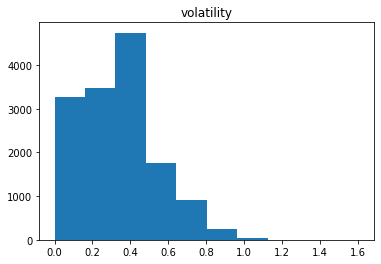

In [ ]:
plt.figure()
plt.title('volatility_1')
plt.hist(volatility_1['orders'])

In [ ]:
def XYZ_segmentation_1(vol):
  if vol < 0.2:
    return 'X'
  if vol >= 0.2 and vol < 0.5:
    return 'Y'
  if vol >= 0.5:
    return 'Z'

group_1_xyz = volatility_1['orders'].apply(XYZ_segmentation_1)
group_1_xyz

PULocationID  DOLocationID
1             1               Y
              265             X
3             200             X
              233             Y
4             1               X
                             ..
265           191             X
              203             X
              231             Y
              264             Y
              265             X
Name: orders, Length: 14471, dtype: object

In [ ]:
group_1_abc = pd.DataFrame(group_1_abc).rename({'total_amount': 'ABC_seg'}, axis=1)
group_1_abc['XYZ_seg'] = group_1_xyz
group_1_class = group_1_abc.dropna()
group_1_class['class'] = group_1_abc['ABC_seg'] + group_1_abc['XYZ_seg']
group_1_class

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,,ABC_seg,XYZ_seg,class
PULocationID,DOLocationID,,,
264,264,A,Y,AY
138,230,A,Y,AY
237,236,A,Y,AY
132,230,A,Y,AY
236,237,A,Y,AY
...,...,...,...,...
126,147,C,X,CX
178,21,C,X,CX
70,264,C,X,CX


In [ ]:
group_1_class['class'].value_counts()

CY    3803
CX    3178
BY    2503
CZ    2293
AY    1702
BZ     502
BX     288
AX     195
AZ       7
Name: class, dtype: int64

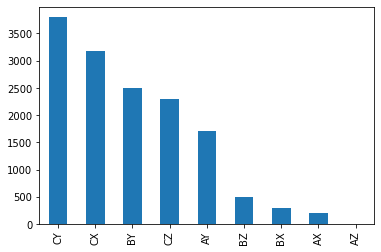

In [ ]:
group_1_class['class'].value_counts().plot(kind='bar')

Оператор №2

In [ ]:
data_2_num = data_2[['PULocationID', 'DOLocationID', 'year_number', 'week_number', 'tpep_pickup_datetime']]
orders_2 = data_2_num.groupby(['year_number', 'week_number', 'PULocationID', 'DOLocationID']).size()
orders_2

year_number  week_number  PULocationID  DOLocationID
2008         1            7             140             1
                          68            88              1
                          107           107             1
                                        249             1
                          132           181             1
                                                       ..
2019         27           142           43              1
                          246           50              1
             30           148           234             1
             33           114           181             1
             36           148           79              1
Length: 91345, dtype: int64

In [ ]:
orders_2 = orders_2.reset_index().iloc[:,2:].rename({0: 'orders'}, axis=1)
orders_2

,PULocationID,DOLocationID,orders
0,7,140,1
1,68,88,1
2,107,107,1
3,107,249,1
4,132,181,1
...,...,...,...
91340,142,43,1
91341,246,50,1
91342,148,234,1
91343,114,181,1


In [ ]:
orders_2_std = orders_2.groupby(['PULocationID', 'DOLocationID']).std().dropna()
orders_2_std

orders
PULocationID DOLocationID           
1            1             17.880157
             132            0.707107
             265            0.577350
2            2              0.000000
3            3              1.816590
...                              ...
265          259            0.000000
             262            0.000000
             263            0.547723
             264            0.500000
             265           50.958807

[21276 rows x 1 columns]

In [ ]:
orders_2_mean = orders_2.groupby(['PULocationID', 'DOLocationID']).mean().dropna()
orders_2_mean

orders
PULocationID DOLocationID        
1            1              45.80
             132             1.50
             137             1.00
             142             1.00
             164             1.00
...                           ...
265          259             2.00
             262             1.00
             263             1.40
             264             2.25
             265           362.60

[29958 rows x 1 columns]

In [ ]:
volatility_2 = (orders_2_std / orders_2_mean).dropna()
volatility_2

orders
PULocationID DOLocationID          
1            1             0.390396
             132           0.471405
             265           0.346410
2            2             0.000000
3            3             0.698689
...                             ...
265          259           0.000000
             262           0.000000
             263           0.391230
             264           0.222222
             265           0.140537

[21276 rows x 1 columns]

(array([4.801e+03, 2.907e+03, 4.832e+03, 4.896e+03, 2.253e+03, 1.152e+03,
        3.200e+02, 9.200e+01, 2.000e+01, 3.000e+00]),
 array([0.        , 0.13462912, 0.26925824, 0.40388736, 0.53851648,
        0.6731456 , 0.80777472, 0.94240384, 1.07703296, 1.21166208,
        1.3462912 ]),
 <a list of 10 Patch objects>)

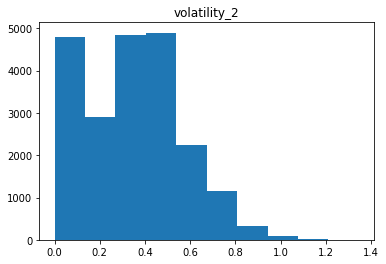

In [ ]:
plt.figure()
plt.title('volatility_2')
plt.hist(volatility_2['orders'])

In [ ]:
def XYZ_segmentation_2(vol):
  if vol < 0.2:
    return 'X'
  if vol >= 0.2 and vol < 0.5:
    return 'Y'
  if vol >= 0.5:
    return 'Z'

group_2_xyz = volatility_2['orders'].apply(XYZ_segmentation_2)
group_2_xyz

PULocationID  DOLocationID
1             1               Y
              132             Y
              265             Y
2             2               X
3             3               Z
                             ..
265           259             X
              262             X
              263             Y
              264             Y
              265             X
Name: orders, Length: 21276, dtype: object

In [ ]:
group_2_abc = pd.DataFrame(group_2_abc).rename({'total_amount': 'ABC_seg'}, axis=1)
group_2_abc['XYZ_seg'] = group_2_xyz
group_2_class = group_2_abc.dropna()
group_2_class['class'] = group_2_abc['ABC_seg'] + group_2_abc['XYZ_seg']
group_2_class

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,,ABC_seg,XYZ_seg,class
PULocationID,DOLocationID,,,
264,264,A,Z,AZ
132,265,A,Z,AZ
138,230,A,Y,AY
132,230,A,Y,AY
237,236,A,Z,AZ
...,...,...,...,...
47,264,C,X,CX
63,180,C,Y,CY
29,264,C,X,CX


In [ ]:
group_2_class['class'].value_counts()

CY    6116
CX    4798
CZ    3633
BY    3365
AY    1586
BZ     810
BX     420
AZ     301
AX     247
Name: class, dtype: int64

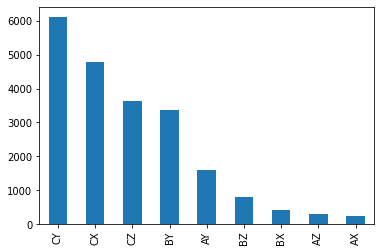

In [ ]:
group_2_class['class'].value_counts().plot(kind='bar')

### **3. Проверка гипотез**

In [ ]:
from scipy import stats

In [ ]:
data_hyp = data[['VendorID', 'PULocationID', 'DOLocationID', 'fare_amount']][data['VendorID']!=4]
data_hyp

,VendorID,PULocationID,DOLocationID,fare_amount
0,1,151,239,7.0
1,1,239,246,14.0
2,2,236,236,4.5
3,2,193,193,3.5
4,2,193,193,52.0
...,...,...,...,...
7667783,2,186,13,14.5
7667784,2,68,233,8.0
7667785,2,161,229,10.5
7667786,2,186,262,17.0


In [ ]:
group_hyp_size = data_hyp.groupby(['PULocationID', 'DOLocationID']).size()
group_hyp_size = group_hyp_size.sort_values(ascending=False)
group_hyp_size.head()

PULocationID  DOLocationID
264           264             138451
237           236              50459
236           236              47146
              237              42867
237           237              39304
dtype: int64

In [ ]:
data_top_5 = data_hyp[(data_hyp['PULocationID']==264) & (data_hyp['DOLocationID']==264) |
                      (data_hyp['PULocationID']==237) & (data_hyp['DOLocationID']==236) |
                      (data_hyp['PULocationID']==236) & (data_hyp['DOLocationID']==236) |
                      (data_hyp['PULocationID']==236) & (data_hyp['DOLocationID']==237) |
                      (data_hyp['PULocationID']==237) & (data_hyp['DOLocationID']==237) ]

In [ ]:
group_top_5 = data_top_5.groupby(['PULocationID', 'DOLocationID', 'VendorID']).mean()
group_top_5

fare_amount
PULocationID DOLocationID VendorID             
236          236          1            4.968908
                          2            5.203442
             237          1            6.869761
                          2            6.890603
237          236          1            6.251920
                          2            6.274501
             237          1            5.370145
                          2            5.537154
264          264          1           15.378081
                          2           11.971343

In [ ]:
data_top_0 = data_top_5[(data_top_5['PULocationID']==236) & (data_top_5['DOLocationID']==236)]
stats.ttest_ind(data_top_0[data_top_0['VendorID']==1], data_top_0[data_top_0['VendorID']==2])

Ttest_indResult(statistic=array([       -inf,         nan,         nan, -6.58249148]), pvalue=array([0.00000000e+00,            nan,            nan, 4.67467898e-11]))

In [ ]:
data_top_1 = data_top_5[(data_top_5['PULocationID']==236) & (data_top_5['DOLocationID']==237)]
stats.ttest_ind(data_top_1[data_top_1['VendorID']==1], data_top_1[data_top_1['VendorID']==2])

Ttest_indResult(statistic=array([      -inf,        nan,        nan, -0.9692263]), pvalue=array([0.        ,        nan,        nan, 0.33243776]))

In [ ]:
data_top_2 = data_top_5[(data_top_5['PULocationID']==237) & (data_top_5['DOLocationID']==236)]
stats.ttest_ind(data_top_2[data_top_2['VendorID']==1], data_top_2[data_top_2['VendorID']==2])

Ttest_indResult(statistic=array([       -inf,         nan,         nan, -1.32617406]), pvalue=array([0.        ,        nan,        nan, 0.18478805]))

In [ ]:
data_top_3 = data_top_5[(data_top_5['PULocationID']==237) & (data_top_5['DOLocationID']==237)]
stats.ttest_ind(data_top_3[data_top_3['VendorID']==1], data_top_3[data_top_3['VendorID']==2])

Ttest_indResult(statistic=array([      -inf,        nan,        nan, -3.9779471]), pvalue=array([0.00000000e+00,            nan,            nan, 6.96373348e-05]))

In [ ]:
data_top_4 = data_top_5[(data_top_5['PULocationID']==264) & (data_top_5['DOLocationID']==264)]
stats.ttest_ind(data_top_4[data_top_4['VendorID']==1], data_top_4[data_top_4['VendorID']==2])

Ttest_indResult(statistic=array([      -inf,        nan,        nan, 2.03153073]), pvalue=array([0.        ,        nan,        nan, 0.04220309]))

Если выбрать уровень значимости 0,05, то для пар зон посадок и высадок 236-236, 237-237, 264-264 гипотеза о равенстве среднего времени поездок отвергается, так как p-value < 0,05,
а для пар зон 236-237 и 237-236 гипотеза о равенстве среднего времени поездок подтверждается, так как p-value > 0,05

### **4. постройте дэшборд**

Сделать не успел. Не хватило практики по работе с базами данных. (((